<a href="https://colab.research.google.com/github/anabellatus/machine_learning/blob/main/ML_Tugas_JS9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tugas Jobsheet 9 Machine learning

### Nama : Ana Bellatus Mustaqfiro
### NIM : 2241720095
### Kelas : TI-3F / 04

## Tugas

*   Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
*   Anda diperbolehkan melakukan eksplorasi terhadap,
  -   Metode pra pengolahan
  -   Pemilihan fitur
  -   Arsitektur ANN
  -   Fungsi Aktiviasi
*  ANN diimplementasikan dengan menggunakan tensorflow
*  **DIKERJAKAN SECARA BERKELOMPOK**
*  **JELASKAN HASIL YANG ANDA DAPATKAN,**
  **- AKURASI**
  **- CONFUSION MATRIX**
  **- KONFIGURASI MODEL -> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN**





### Pra Pengolahan Data

Import Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
# from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.datasets import mnist

Load Data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Pengecekan Data MINST

Jumlah data keseluruhan: 60000
Jumlah data dengan label 0: 5923
Jumlah data dengan label 1: 6742
Jumlah data dengan label 2: 5958
Jumlah data dengan label 3: 6131
Jumlah data dengan label 4: 5842
Jumlah data dengan label 5: 5421
Jumlah data dengan label 6: 5918
Jumlah data dengan label 7: 6265
Jumlah data dengan label 8: 5851
Jumlah data dengan label 9: 5949
Dimensi data: (28, 28)


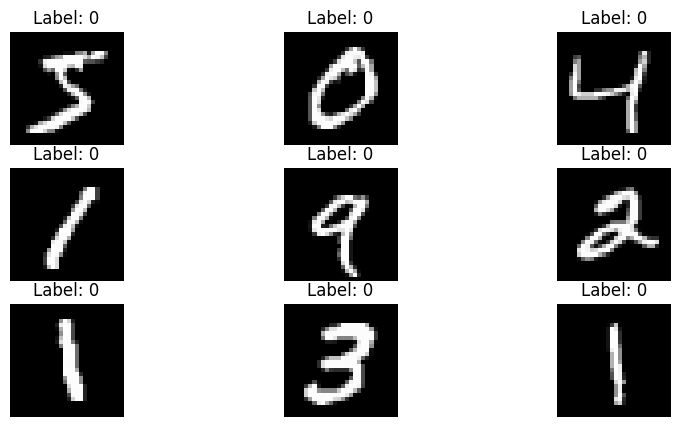

In [13]:
# Menghitung jumlah keseluruhan data
total_data = len(y_train)
print (f"Jumlah data keseluruhan: {total_data}")

# Menghitung jumlah data MNIST pada setiap label
label_counts = np.bincount(y_train)
for label, count in enumerate(label_counts):
  print(f"Jumlah data dengan label {label}: {count}")

# Menampilkan dimensi data
data_shape = x_train[0].shape
print (f"Dimensi data: {data_shape}")

# Menampilkan data
plt.figure(figsize=(10, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {np.argmax(y_train[i])}')
    plt.axis('off')
plt.show()

Normaliasasi Data

In [14]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Mengubah Bentuk Data

In [15]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

Split Data

In [16]:
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

### Membuat Model ANN

Inisiasi Model ANN

In [17]:
ann = tf.keras.models.Sequential()

Membuat Input Layer dan Hidden Layer Pertama

In [18]:
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))

Membuat Hidden Layer Kedua

In [19]:
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

Membuat Output Layer

In [20]:
ann.add(tf.keras.layers.Dense(units=10, activation='softmax'))

### Train Model

Compile Model ANN

In [21]:
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)

Fitting Model

In [22]:
ann.fit(X_train, y_train, batch_size=256, epochs=10, shuffle=True)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.7695 - loss: 0.8408
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.9412 - loss: 0.1984
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9582 - loss: 0.1424
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 26s 93ms/step - accuracy: 0.9670 - loss: 0.1068
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step - accuracy: 0.9765 - loss: 0.0823
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 69ms/step - accuracy: 0.9786 - loss: 0.0716
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 21s 69ms/step - accuracy: 0.9835 - loss: 0.0573
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.9876 - loss: 0.0471
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.9896 - loss: 0.0382
Epoch 10/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.9899 - loss: 0.0336


In [23]:
test_loss, test_accuracy = ann.evaluate(x_test, y_test, verbose=2)
print(f'Test Accuracy: {test_accuracy}')

y_pred = np.argmax(ann.predict(x_test), axis=-1)

cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

313/313 - 4s - 14ms/step - accuracy: 0.9738 - loss: 0.0859
Test Accuracy: 0.973800003528595
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Confusion Matrix:
[[ 966    2    2    1    0    0    4    1    1    3]
 [   0 1125    4    0    0    1    2    1    2    0]
 [   4    2 1009    4    1    0    0   10    1    1]
 [   0    0    4  991    0    2    0    6    3    4]
 [   2    0    3    0  958    0    2    3    1   13]
 [   3    2    0   17    2  852    5    2    5    4]
 [   4    3    3    1    4    5  933    1    4    0]
 [   0    9    6    1    1    0    0 1005    1    5]
 [   4    3    8   13    5    4    1   10  922    4]
 [   2    6    0    5   10    1    0    8    0  977]]


Visualisasi Confussion Matrix dalam Heatmap

Akurasi: 0.9738


Text(0.5, 1.0, 'Confusion Matrix')

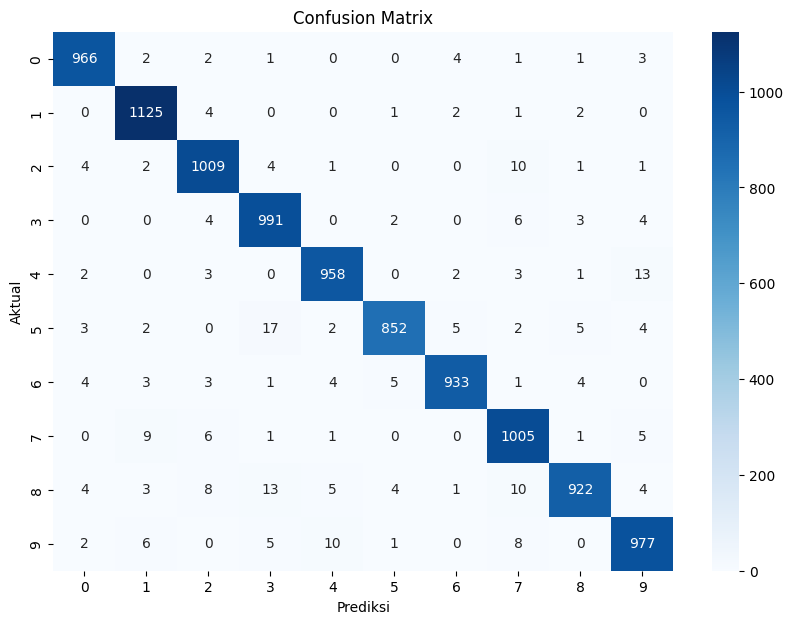

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')

Visualisasi Hasil Prediksi

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


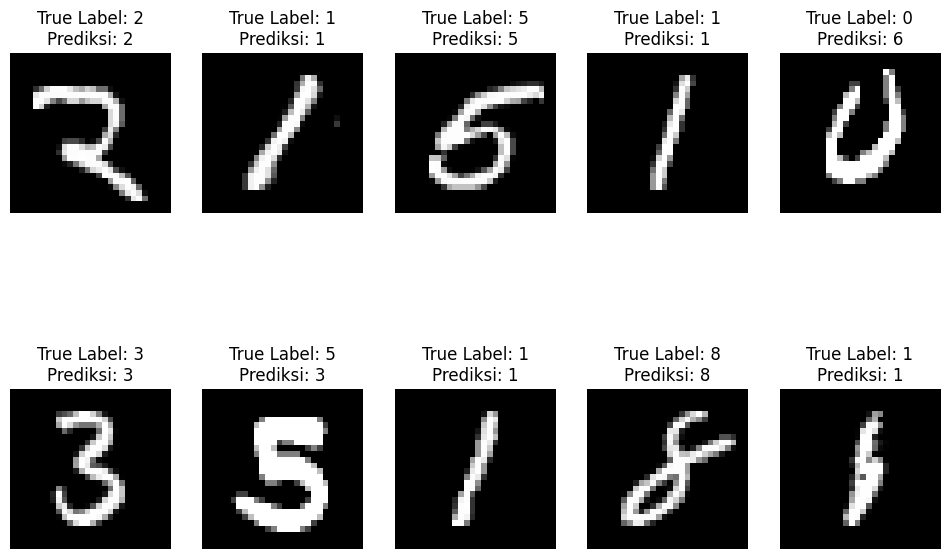

In [26]:
random_indices = np.random.choice(x_test.shape[0], 10, replace=False)

original_images = x_test[random_indices].reshape(-1, 28, 28)
true_labels = y_test[random_indices]
predictions = ann.predict(x_test)
predicted_labels = np.argmax(predictions, axis=-1)

plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(original_images[i], cmap='gray')
    plt.title(f'True Label: {true_labels[i]}\nPrediksi: {predicted_labels[random_indices[i]]}')
    plt.axis('off')

plt.show()